# 神经网络
- 时间复杂度：高
- 空间复杂度：中

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')  # 不打印警告
from a_Data_preprocessing import load_xy, vocabs
from b_metrics import metric, Timer
%matplotlib inline
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Embedding, Dense
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.python.keras.utils import to_categorical
from numpy import argmax

## 配置

In [2]:
maxlen = 200  # 序列长度
input_dim = vocabs + 1
output_dim = 100  # 词向量维度
batch_size = 256
epochs = 99
verbose = 2
patience = 1  # 没有进步的训练轮数
callbacks = [EarlyStopping('val_acc', patience=patience)]
validation_split = .05

## 数据读取、预处理

In [3]:
X_train, X_test, y_train, y_test = load_xy(1)
X_train = pad_sequences(X_train, maxlen)
X_test = pad_sequences(X_test, maxlen)
y_train = to_categorical(y_train, 9)
y_test = to_categorical(y_test, 9)

### CNN

In [4]:
from tensorflow.python.keras.layers import Conv1D, MaxPool1D, GlobalMaxPool1D
filters = 50  # 卷积滤波器数量
kernel_size = 10  # 卷积层滤波器大小
model = Sequential(name='CNN')
model.add(Embedding(input_dim, output_dim, input_length=maxlen, input_shape=(maxlen,)))
model.add(Conv1D(filters, kernel_size * 2, padding='same', activation='relu'))
model.add(MaxPool1D(pool_size=2))  # strides默认等于pool_size
model.add(Conv1D(filters * 2, kernel_size, padding='same', activation='relu'))
model.add(GlobalMaxPool1D())  # 对于时序数据的全局最大池化
model.add(Dense(9, activation='softmax'))
model.summary()

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 100)          5000100   
_________________________________________________________________
conv1d (Conv1D)              (None, 200, 50)           100050    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 100, 50)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 100, 100)          50100     
_________________________________________________________________
global_max_pooling1d (Global (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 9)                 909       
Total params: 5,151,159
Trainable params: 5,151,159
Non-trainable params: 0
_____________________________________________________

In [5]:
t = Timer()
model.compile('adam', 'categorical_crossentropy', ['acc'])
model.fit(X_train, y_train, batch_size, epochs, verbose, callbacks, validation_split)
del t

Train on 13304 samples, validate on 701 samples
Epoch 1/99
13304/13304 - 39s - loss: 1.8321 - acc: 0.3351 - val_loss: 0.9061 - val_acc: 0.7147
Epoch 2/99
13304/13304 - 38s - loss: 0.5522 - acc: 0.8270 - val_loss: 0.5424 - val_acc: 0.8160
Epoch 3/99
13304/13304 - 38s - loss: 0.1651 - acc: 0.9528 - val_loss: 0.5986 - val_acc: 0.8217
Epoch 4/99
13304/13304 - 38s - loss: 0.0606 - acc: 0.9844 - val_loss: 0.6682 - val_acc: 0.8288
Epoch 5/99
13304/13304 - 38s - loss: 0.0420 - acc: 0.9875 - val_loss: 0.7008 - val_acc: 0.8274
3.17分钟


                precision    recall  f1-score   support

          car_       0.96      0.94      0.95       409
    education_       0.88      0.86      0.87       410
entertainment_       0.74      0.78      0.76       375
      fashion_       0.77      0.81      0.79       394
      finance_       0.85      0.78      0.81       402
     military_       0.72      0.85      0.78       343
     politics_       0.71      0.65      0.68       400
      science_       0.79      0.77      0.78       372
       sports_       0.99      0.96      0.97       393

     micro avg       0.82      0.82      0.82      3498
     macro avg       0.82      0.82      0.82      3498
  weighted avg       0.83      0.82      0.82      3498



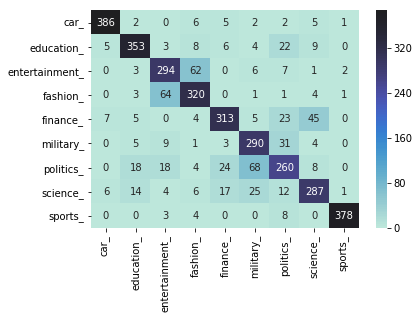

In [6]:
y_pred = model.predict(X_test)
metric(argmax(y_test, axis=1), argmax(y_pred, axis=1))

### LSTM

In [7]:
from tensorflow.python.keras.layers import LSTM
units = 50  # RNN神经元数量
model = Sequential(name='RNN')
model.add(Embedding(input_dim, output_dim, input_length=maxlen, input_shape=(maxlen,)))
model.add(LSTM(units))  # 返回序列最尾结果
model.add(Dense(9, activation='softmax'))
model.summary()

Model: "RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          5000100   
_________________________________________________________________
lstm (LSTM)                  (None, 50)                30200     
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 459       
Total params: 5,030,759
Trainable params: 5,030,759
Non-trainable params: 0
_________________________________________________________________


In [8]:
t = Timer()
model.compile('adam', 'categorical_crossentropy', ['acc'])
model.fit(X_train, y_train, batch_size, epochs, verbose, callbacks, validation_split)
del t

Train on 13304 samples, validate on 701 samples
Epoch 1/99
13304/13304 - 45s - loss: 1.9824 - acc: 0.3779 - val_loss: 1.5049 - val_acc: 0.5706
Epoch 2/99
13304/13304 - 43s - loss: 1.1401 - acc: 0.6681 - val_loss: 0.9899 - val_acc: 0.7233
Epoch 3/99
13304/13304 - 44s - loss: 0.6747 - acc: 0.8365 - val_loss: 0.7882 - val_acc: 0.7718
Epoch 4/99
13304/13304 - 44s - loss: 0.4084 - acc: 0.9014 - val_loss: 0.7576 - val_acc: 0.7632
2.96分钟


                precision    recall  f1-score   support

          car_       0.93      0.91      0.92       409
    education_       0.87      0.86      0.87       410
entertainment_       0.64      0.73      0.68       375
      fashion_       0.68      0.79      0.73       394
      finance_       0.81      0.71      0.76       402
     military_       0.76      0.68      0.71       343
     politics_       0.66      0.69      0.67       400
      science_       0.72      0.69      0.70       372
       sports_       0.98      0.95      0.96       393

     micro avg       0.78      0.78      0.78      3498
     macro avg       0.78      0.78      0.78      3498
  weighted avg       0.79      0.78      0.78      3498



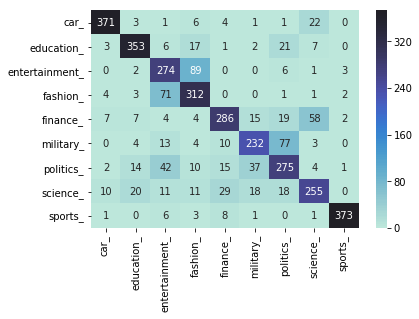

In [9]:
y_pred = model.predict(X_test)
metric(argmax(y_test, axis=1), argmax(y_pred, axis=1))